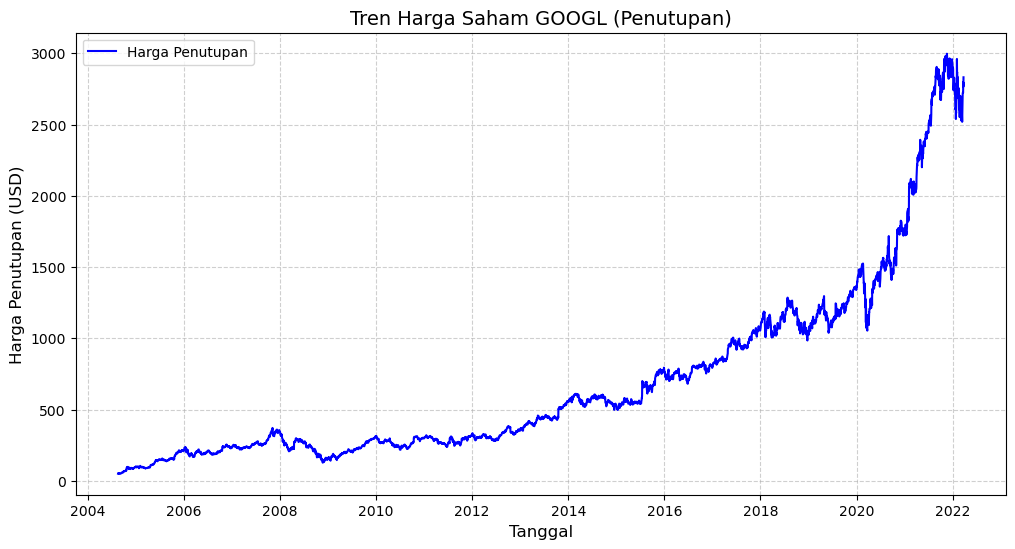

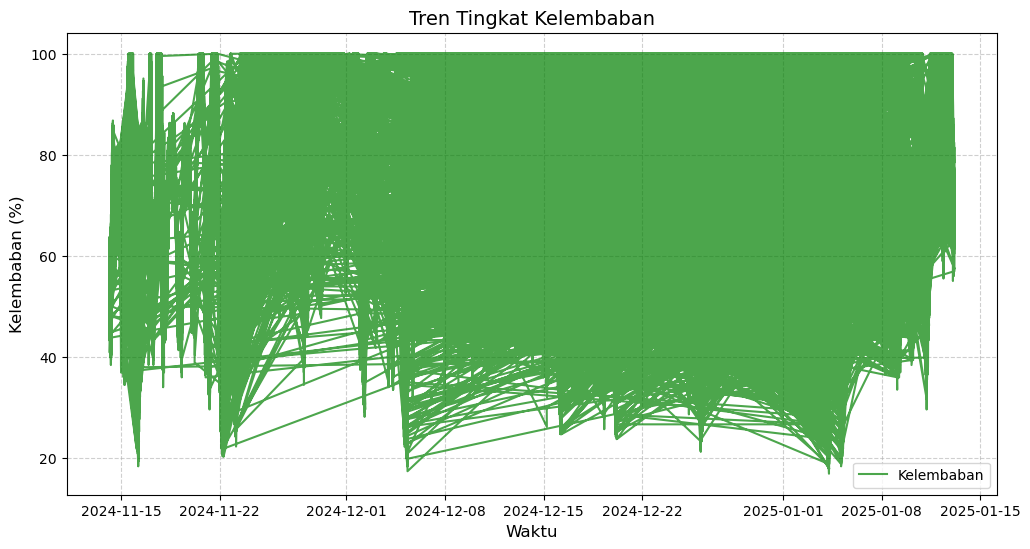

Statistik Deskriptif Data Saham GOOGL:
              Open         High          Low        Close
count  4431.000000  4431.000000  4431.000000  4431.000000
mean    693.087345   699.735595   686.078751   693.097367
std     645.118799   651.331215   638.579488   645.187806
min      49.644646    50.920921    48.028027    50.055054
25%     248.558563   250.853355   245.813309   248.415916
50%     434.924927   437.887878   432.687683   435.330322
75%    1007.364990  1020.649994   997.274994  1007.790008
max    3025.000000  3030.929932  2977.979980  2996.770020

Statistik Deskriptif Data Kelembaban:
       temperature_merged  humidity_merged
count        48510.000000     48510.000000
mean            20.435845        74.753915
std              6.711040        18.882668
min              5.530000        16.950000
25%             15.390000        60.890000
50%             19.280000        77.010000
75%             24.710000        91.170000
max             46.460000        99.960000


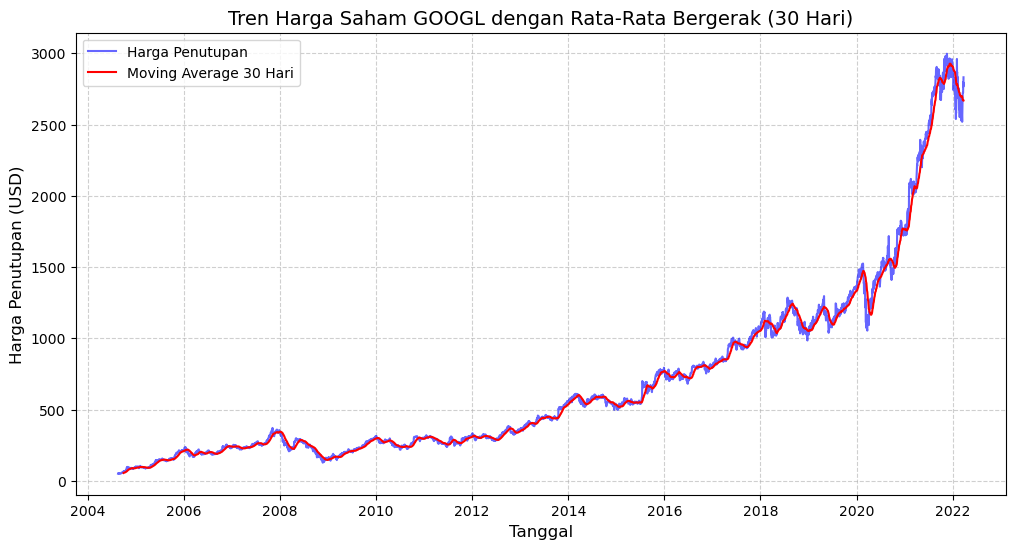

Jumlah outlier dalam kelembaban: 6


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
googl_data = pd.read_csv("GOOGL.csv")
humidity_data = pd.read_csv("humidity.csv")

# Konversi kolom waktu ke format datetime
googl_data['Date'] = pd.to_datetime(googl_data['Date'])
humidity_data['time'] = pd.to_datetime(humidity_data['time'])

# Visualisasi tren harga saham (Close price)
plt.figure(figsize=(12, 6))
plt.plot(googl_data['Date'], googl_data['Close'], label='Harga Penutupan', color='blue')
plt.title('Tren Harga Saham GOOGL (Penutupan)', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga Penutupan (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Visualisasi tren kelembaban
plt.figure(figsize=(12, 6))
plt.plot(humidity_data['time'], humidity_data['humidity_merged'], label='Kelembaban', color='green', alpha=0.7)
plt.title('Tren Tingkat Kelembaban', fontsize=14)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Kelembaban (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Analisis Statistik
googl_stats = googl_data[['Open', 'High', 'Low', 'Close']].describe()
humidity_stats = humidity_data[['temperature_merged', 'humidity_merged']].describe()

# Menampilkan statistik deskriptif
print("Statistik Deskriptif Data Saham GOOGL:")
print(googl_stats)
print("\nStatistik Deskriptif Data Kelembaban:")
print(humidity_stats)

# Deteksi tren rata-rata bergerak (Moving Average) pada harga saham
googl_data['MA_30'] = googl_data['Close'].rolling(window=30).mean()

# Visualisasi Moving Average
plt.figure(figsize=(12, 6))
plt.plot(googl_data['Date'], googl_data['Close'], label='Harga Penutupan', color='blue', alpha=0.6)
plt.plot(googl_data['Date'], googl_data['MA_30'], label='Moving Average 30 Hari', color='red')
plt.title('Tren Harga Saham GOOGL dengan Rata-Rata Bergerak (30 Hari)', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Harga Penutupan (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Deteksi outlier kelembaban menggunakan Z-score
from scipy.stats import zscore
humidity_data['z_humidity'] = zscore(humidity_data['humidity_merged'])

outliers = humidity_data[abs(humidity_data['z_humidity']) > 3]
print(f"Jumlah outlier dalam kelembaban: {len(outliers)}")
